<span style="color:red; font-family:Helvetica Neue, Helvetica, Arial, sans-serif; font-size:2em;">An Exception was encountered at '<a href="#papermill-error-cell">In [20]</a>'.</span>

## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 0


## Dataset 


In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

         X8        X9       X10       X11       X12       X13         Y  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503  


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.03548


0:	learn: 0.9631798	total: 62.6ms	remaining: 1m 2s
1:	learn: 0.9416940	total: 65.2ms	remaining: 32.5s
2:	learn: 0.9224372	total: 71.3ms	remaining: 23.7s
3:	learn: 0.9049832	total: 73.7ms	remaining: 18.4s
4:	learn: 0.8862101	total: 78ms	remaining: 15.5s
5:	learn: 0.8707816	total: 80.4ms	remaining: 13.3s
6:	learn: 0.8538722	total: 82.9ms	remaining: 11.8s
7:	learn: 0.8371289	total: 85.2ms	remaining: 10.6s
8:	learn: 0.8202033	total: 89.1ms	remaining: 9.81s
9:	learn: 0.8022459	total: 91.8ms	remaining: 9.09s
10:	learn: 0.7882974	total: 96.7ms	remaining: 8.7s
11:	learn: 0.7735095	total: 101ms	remaining: 8.3s
12:	learn: 0.7581426	total: 103ms	remaining: 7.83s
13:	learn: 0.7424612	total: 106ms	remaining: 7.47s
14:	learn: 0.7293492	total: 110ms	remaining: 7.21s
15:	learn: 0.7142191	total: 112ms	remaining: 6.89s
16:	learn: 0.7017994	total: 115ms	remaining: 6.62s
17:	learn: 0.6891295	total: 116ms	remaining: 6.34s
18:	learn: 0.6767998	total: 118ms	remaining: 6.12s
19:	learn: 0.6645472	total: 121ms	

34:	learn: 0.5212053	total: 160ms	remaining: 4.4s
35:	learn: 0.5135832	total: 162ms	remaining: 4.34s
36:	learn: 0.5070778	total: 164ms	remaining: 4.28s
37:	learn: 0.4996246	total: 167ms	remaining: 4.23s
38:	learn: 0.4926868	total: 171ms	remaining: 4.22s
39:	learn: 0.4857845	total: 174ms	remaining: 4.18s
40:	learn: 0.4793617	total: 177ms	remaining: 4.13s
41:	learn: 0.4722079	total: 181ms	remaining: 4.14s
42:	learn: 0.4674227	total: 185ms	remaining: 4.12s
43:	learn: 0.4620761	total: 187ms	remaining: 4.07s
44:	learn: 0.4564340	total: 190ms	remaining: 4.03s
45:	learn: 0.4506731	total: 192ms	remaining: 3.99s
46:	learn: 0.4454702	total: 195ms	remaining: 3.96s
47:	learn: 0.4394315	total: 198ms	remaining: 3.92s
48:	learn: 0.4340205	total: 200ms	remaining: 3.88s
49:	learn: 0.4296563	total: 202ms	remaining: 3.84s
50:	learn: 0.4246580	total: 204ms	remaining: 3.8s
51:	learn: 0.4201994	total: 207ms	remaining: 3.77s
52:	learn: 0.4142957	total: 210ms	remaining: 3.74s
53:	learn: 0.4108606	total: 211ms

60:	learn: 0.3811709	total: 234ms	remaining: 3.6s
61:	learn: 0.3770796	total: 236ms	remaining: 3.57s
62:	learn: 0.3746913	total: 238ms	remaining: 3.54s
63:	learn: 0.3716077	total: 241ms	remaining: 3.52s
64:	learn: 0.3682171	total: 243ms	remaining: 3.5s
65:	learn: 0.3647238	total: 245ms	remaining: 3.47s
66:	learn: 0.3612155	total: 247ms	remaining: 3.45s
67:	learn: 0.3586366	total: 251ms	remaining: 3.44s
68:	learn: 0.3556916	total: 254ms	remaining: 3.43s
69:	learn: 0.3532968	total: 257ms	remaining: 3.42s
70:	learn: 0.3500071	total: 260ms	remaining: 3.4s
71:	learn: 0.3473676	total: 262ms	remaining: 3.38s
72:	learn: 0.3451228	total: 265ms	remaining: 3.36s
73:	learn: 0.3421904	total: 267ms	remaining: 3.35s
74:	learn: 0.3397958	total: 270ms	remaining: 3.33s
75:	learn: 0.3370846	total: 272ms	remaining: 3.31s
76:	learn: 0.3351282	total: 275ms	remaining: 3.3s
77:	learn: 0.3323522	total: 277ms	remaining: 3.28s
78:	learn: 0.3298830	total: 280ms	remaining: 3.26s
79:	learn: 0.3275978	total: 282ms	r

90:	learn: 0.3066007	total: 339ms	remaining: 3.39s
91:	learn: 0.3053355	total: 344ms	remaining: 3.39s
92:	learn: 0.3039422	total: 346ms	remaining: 3.38s
93:	learn: 0.3025270	total: 352ms	remaining: 3.39s
94:	learn: 0.3009675	total: 372ms	remaining: 3.54s
95:	learn: 0.3000956	total: 376ms	remaining: 3.54s
96:	learn: 0.2988610	total: 378ms	remaining: 3.52s
97:	learn: 0.2976094	total: 380ms	remaining: 3.5s
98:	learn: 0.2964205	total: 383ms	remaining: 3.48s
99:	learn: 0.2953873	total: 385ms	remaining: 3.47s
100:	learn: 0.2941090	total: 388ms	remaining: 3.45s
101:	learn: 0.2926980	total: 390ms	remaining: 3.44s
102:	learn: 0.2912370	total: 393ms	remaining: 3.42s


103:	learn: 0.2901807	total: 407ms	remaining: 3.5s
104:	learn: 0.2888988	total: 420ms	remaining: 3.58s
105:	learn: 0.2872732	total: 430ms	remaining: 3.63s
106:	learn: 0.2858506	total: 433ms	remaining: 3.61s
107:	learn: 0.2849448	total: 435ms	remaining: 3.59s
108:	learn: 0.2839769	total: 437ms	remaining: 3.58s
109:	learn: 0.2831606	total: 440ms	remaining: 3.56s
110:	learn: 0.2821541	total: 442ms	remaining: 3.54s
111:	learn: 0.2809457	total: 444ms	remaining: 3.52s
112:	learn: 0.2796915	total: 447ms	remaining: 3.51s
113:	learn: 0.2785322	total: 449ms	remaining: 3.49s
114:	learn: 0.2774535	total: 452ms	remaining: 3.48s
115:	learn: 0.2767022	total: 454ms	remaining: 3.46s
116:	learn: 0.2752425	total: 457ms	remaining: 3.45s
117:	learn: 0.2741010	total: 460ms	remaining: 3.44s
118:	learn: 0.2736018	total: 462ms	remaining: 3.42s
119:	learn: 0.2727254	total: 465ms	remaining: 3.41s
120:	learn: 0.2717220	total: 471ms	remaining: 3.42s
121:	learn: 0.2710216	total: 480ms	remaining: 3.45s
122:	learn: 0

134:	learn: 0.2588273	total: 515ms	remaining: 3.3s
135:	learn: 0.2581519	total: 517ms	remaining: 3.29s
136:	learn: 0.2570329	total: 520ms	remaining: 3.27s
137:	learn: 0.2563220	total: 522ms	remaining: 3.26s
138:	learn: 0.2552351	total: 524ms	remaining: 3.25s
139:	learn: 0.2543875	total: 527ms	remaining: 3.24s
140:	learn: 0.2535725	total: 529ms	remaining: 3.23s
141:	learn: 0.2528895	total: 532ms	remaining: 3.21s
142:	learn: 0.2520209	total: 534ms	remaining: 3.2s
143:	learn: 0.2512147	total: 537ms	remaining: 3.19s
144:	learn: 0.2507338	total: 539ms	remaining: 3.18s
145:	learn: 0.2499280	total: 541ms	remaining: 3.17s
146:	learn: 0.2493211	total: 544ms	remaining: 3.15s
147:	learn: 0.2488456	total: 546ms	remaining: 3.14s
148:	learn: 0.2480440	total: 547ms	remaining: 3.13s
149:	learn: 0.2474605	total: 550ms	remaining: 3.12s
150:	learn: 0.2468238	total: 552ms	remaining: 3.1s
151:	learn: 0.2461800	total: 555ms	remaining: 3.1s
152:	learn: 0.2455870	total: 558ms	remaining: 3.09s
153:	learn: 0.24

164:	learn: 0.2391395	total: 586ms	remaining: 2.96s
165:	learn: 0.2388450	total: 588ms	remaining: 2.96s
166:	learn: 0.2384509	total: 591ms	remaining: 2.95s
167:	learn: 0.2382138	total: 593ms	remaining: 2.94s
168:	learn: 0.2378648	total: 596ms	remaining: 2.93s
169:	learn: 0.2371199	total: 598ms	remaining: 2.92s
170:	learn: 0.2368035	total: 600ms	remaining: 2.91s
171:	learn: 0.2362543	total: 603ms	remaining: 2.9s
172:	learn: 0.2356245	total: 605ms	remaining: 2.89s
173:	learn: 0.2349618	total: 607ms	remaining: 2.88s
174:	learn: 0.2340556	total: 609ms	remaining: 2.87s
175:	learn: 0.2337560	total: 612ms	remaining: 2.86s
176:	learn: 0.2334463	total: 614ms	remaining: 2.85s
177:	learn: 0.2328056	total: 616ms	remaining: 2.85s
178:	learn: 0.2324589	total: 619ms	remaining: 2.84s
179:	learn: 0.2317931	total: 621ms	remaining: 2.83s
180:	learn: 0.2306238	total: 623ms	remaining: 2.82s
181:	learn: 0.2301082	total: 626ms	remaining: 2.81s
182:	learn: 0.2297202	total: 628ms	remaining: 2.8s
183:	learn: 0.

199:	learn: 0.2188475	total: 690ms	remaining: 2.76s
200:	learn: 0.2182723	total: 712ms	remaining: 2.83s
201:	learn: 0.2181318	total: 725ms	remaining: 2.86s
202:	learn: 0.2170872	total: 727ms	remaining: 2.85s
203:	learn: 0.2166948	total: 730ms	remaining: 2.85s
204:	learn: 0.2165270	total: 733ms	remaining: 2.84s


205:	learn: 0.2158706	total: 736ms	remaining: 2.84s
206:	learn: 0.2154119	total: 741ms	remaining: 2.84s
207:	learn: 0.2150267	total: 743ms	remaining: 2.83s
208:	learn: 0.2142821	total: 745ms	remaining: 2.82s
209:	learn: 0.2137308	total: 749ms	remaining: 2.82s
210:	learn: 0.2133447	total: 752ms	remaining: 2.81s
211:	learn: 0.2129103	total: 754ms	remaining: 2.8s
212:	learn: 0.2125402	total: 756ms	remaining: 2.79s
213:	learn: 0.2123739	total: 758ms	remaining: 2.78s
214:	learn: 0.2118088	total: 760ms	remaining: 2.78s
215:	learn: 0.2110156	total: 763ms	remaining: 2.77s
216:	learn: 0.2105777	total: 765ms	remaining: 2.76s
217:	learn: 0.2102923	total: 768ms	remaining: 2.75s
218:	learn: 0.2101762	total: 771ms	remaining: 2.75s
219:	learn: 0.2098589	total: 773ms	remaining: 2.74s
220:	learn: 0.2096736	total: 776ms	remaining: 2.73s
221:	learn: 0.2094698	total: 779ms	remaining: 2.73s
222:	learn: 0.2091806	total: 785ms	remaining: 2.73s
223:	learn: 0.2085376	total: 788ms	remaining: 2.73s
224:	learn: 0

233:	learn: 0.2052844	total: 825ms	remaining: 2.7s
234:	learn: 0.2051398	total: 828ms	remaining: 2.69s
235:	learn: 0.2046299	total: 833ms	remaining: 2.7s
236:	learn: 0.2041492	total: 837ms	remaining: 2.69s
237:	learn: 0.2036671	total: 840ms	remaining: 2.69s
238:	learn: 0.2033916	total: 843ms	remaining: 2.68s
239:	learn: 0.2030506	total: 845ms	remaining: 2.68s
240:	learn: 0.2029309	total: 848ms	remaining: 2.67s
241:	learn: 0.2025913	total: 851ms	remaining: 2.67s
242:	learn: 0.2021935	total: 854ms	remaining: 2.66s
243:	learn: 0.2019193	total: 856ms	remaining: 2.65s
244:	learn: 0.2014777	total: 859ms	remaining: 2.65s
245:	learn: 0.2013779	total: 861ms	remaining: 2.64s
246:	learn: 0.2012830	total: 864ms	remaining: 2.63s
247:	learn: 0.2006971	total: 866ms	remaining: 2.63s
248:	learn: 0.1999190	total: 868ms	remaining: 2.62s
249:	learn: 0.1997896	total: 871ms	remaining: 2.61s
250:	learn: 0.1990651	total: 874ms	remaining: 2.61s


251:	learn: 0.1989776	total: 878ms	remaining: 2.6s
252:	learn: 0.1983524	total: 881ms	remaining: 2.6s
253:	learn: 0.1982806	total: 883ms	remaining: 2.59s
254:	learn: 0.1982064	total: 887ms	remaining: 2.59s
255:	learn: 0.1975831	total: 891ms	remaining: 2.59s
256:	learn: 0.1971392	total: 893ms	remaining: 2.58s
257:	learn: 0.1966845	total: 896ms	remaining: 2.58s
258:	learn: 0.1960341	total: 898ms	remaining: 2.57s
259:	learn: 0.1956943	total: 900ms	remaining: 2.56s
260:	learn: 0.1956149	total: 903ms	remaining: 2.56s
261:	learn: 0.1953200	total: 904ms	remaining: 2.55s
262:	learn: 0.1952412	total: 907ms	remaining: 2.54s
263:	learn: 0.1944527	total: 909ms	remaining: 2.53s
264:	learn: 0.1938414	total: 913ms	remaining: 2.53s
265:	learn: 0.1933080	total: 919ms	remaining: 2.54s
266:	learn: 0.1932236	total: 927ms	remaining: 2.54s
267:	learn: 0.1931454	total: 930ms	remaining: 2.54s
268:	learn: 0.1930823	total: 932ms	remaining: 2.53s
269:	learn: 0.1928361	total: 934ms	remaining: 2.53s
270:	learn: 0.

288:	learn: 0.1841593	total: 984ms	remaining: 2.42s
289:	learn: 0.1836444	total: 986ms	remaining: 2.42s
290:	learn: 0.1829686	total: 989ms	remaining: 2.41s
291:	learn: 0.1826605	total: 991ms	remaining: 2.4s
292:	learn: 0.1825905	total: 994ms	remaining: 2.4s
293:	learn: 0.1821063	total: 996ms	remaining: 2.39s
294:	learn: 0.1815196	total: 998ms	remaining: 2.39s
295:	learn: 0.1811648	total: 1s	remaining: 2.38s
296:	learn: 0.1807083	total: 1s	remaining: 2.38s
297:	learn: 0.1800916	total: 1.01s	remaining: 2.37s
298:	learn: 0.1797196	total: 1.01s	remaining: 2.37s
299:	learn: 0.1792893	total: 1.01s	remaining: 2.36s
300:	learn: 0.1786250	total: 1.01s	remaining: 2.35s
301:	learn: 0.1778873	total: 1.02s	remaining: 2.35s
302:	learn: 0.1774612	total: 1.02s	remaining: 2.34s
303:	learn: 0.1773993	total: 1.02s	remaining: 2.34s
304:	learn: 0.1768630	total: 1.02s	remaining: 2.33s
305:	learn: 0.1766181	total: 1.02s	remaining: 2.33s
306:	learn: 0.1765599	total: 1.03s	remaining: 2.32s
307:	learn: 0.176089

314:	learn: 0.1742400	total: 1.05s	remaining: 2.28s
315:	learn: 0.1739021	total: 1.05s	remaining: 2.27s
316:	learn: 0.1732204	total: 1.05s	remaining: 2.27s
317:	learn: 0.1725906	total: 1.05s	remaining: 2.26s
318:	learn: 0.1721912	total: 1.06s	remaining: 2.26s
319:	learn: 0.1716645	total: 1.06s	remaining: 2.25s
320:	learn: 0.1709116	total: 1.06s	remaining: 2.25s
321:	learn: 0.1705180	total: 1.06s	remaining: 2.24s
322:	learn: 0.1698932	total: 1.07s	remaining: 2.24s
323:	learn: 0.1694525	total: 1.07s	remaining: 2.23s
324:	learn: 0.1689717	total: 1.07s	remaining: 2.23s
325:	learn: 0.1685130	total: 1.07s	remaining: 2.22s
326:	learn: 0.1681552	total: 1.08s	remaining: 2.22s
327:	learn: 0.1681041	total: 1.08s	remaining: 2.21s
328:	learn: 0.1675904	total: 1.08s	remaining: 2.21s
329:	learn: 0.1669326	total: 1.08s	remaining: 2.2s
330:	learn: 0.1664751	total: 1.09s	remaining: 2.2s
331:	learn: 0.1659389	total: 1.09s	remaining: 2.19s
332:	learn: 0.1654651	total: 1.09s	remaining: 2.19s
333:	learn: 0.

359:	learn: 0.1554286	total: 1.16s	remaining: 2.06s
360:	learn: 0.1551262	total: 1.16s	remaining: 2.06s
361:	learn: 0.1547467	total: 1.16s	remaining: 2.05s
362:	learn: 0.1543126	total: 1.17s	remaining: 2.05s
363:	learn: 0.1537398	total: 1.17s	remaining: 2.04s
364:	learn: 0.1534697	total: 1.18s	remaining: 2.04s
365:	learn: 0.1530778	total: 1.18s	remaining: 2.04s
366:	learn: 0.1527728	total: 1.18s	remaining: 2.04s
367:	learn: 0.1522799	total: 1.18s	remaining: 2.03s
368:	learn: 0.1518766	total: 1.19s	remaining: 2.03s
369:	learn: 0.1515780	total: 1.19s	remaining: 2.02s
370:	learn: 0.1513626	total: 1.19s	remaining: 2.02s
371:	learn: 0.1509832	total: 1.19s	remaining: 2.01s
372:	learn: 0.1507671	total: 1.2s	remaining: 2.01s
373:	learn: 0.1504206	total: 1.2s	remaining: 2s
374:	learn: 0.1500450	total: 1.2s	remaining: 2s
375:	learn: 0.1494326	total: 1.2s	remaining: 2s
376:	learn: 0.1490514	total: 1.21s	remaining: 1.99s
377:	learn: 0.1487578	total: 1.21s	remaining: 1.99s
378:	learn: 0.1484441	tot

380:	learn: 0.1474591	total: 1.22s	remaining: 1.98s
381:	learn: 0.1474327	total: 1.23s	remaining: 1.99s
382:	learn: 0.1472792	total: 1.23s	remaining: 1.99s
383:	learn: 0.1470867	total: 1.24s	remaining: 1.98s
384:	learn: 0.1466303	total: 1.24s	remaining: 1.98s
385:	learn: 0.1462049	total: 1.24s	remaining: 1.98s
386:	learn: 0.1457911	total: 1.25s	remaining: 1.97s
387:	learn: 0.1453974	total: 1.25s	remaining: 1.97s
388:	learn: 0.1450988	total: 1.25s	remaining: 1.96s
389:	learn: 0.1448961	total: 1.25s	remaining: 1.96s
390:	learn: 0.1445003	total: 1.25s	remaining: 1.95s
391:	learn: 0.1440359	total: 1.26s	remaining: 1.95s
392:	learn: 0.1437666	total: 1.26s	remaining: 1.95s
393:	learn: 0.1435928	total: 1.27s	remaining: 1.95s
394:	learn: 0.1432591	total: 1.27s	remaining: 1.95s
395:	learn: 0.1427450	total: 1.27s	remaining: 1.94s
396:	learn: 0.1425115	total: 1.28s	remaining: 1.94s
397:	learn: 0.1423800	total: 1.28s	remaining: 1.94s
398:	learn: 0.1420908	total: 1.28s	remaining: 1.93s
399:	learn: 

419:	learn: 0.1377343	total: 1.33s	remaining: 1.84s
420:	learn: 0.1376635	total: 1.33s	remaining: 1.83s
421:	learn: 0.1376413	total: 1.34s	remaining: 1.83s
422:	learn: 0.1373181	total: 1.34s	remaining: 1.83s
423:	learn: 0.1368351	total: 1.34s	remaining: 1.82s
424:	learn: 0.1364178	total: 1.34s	remaining: 1.82s
425:	learn: 0.1363626	total: 1.34s	remaining: 1.81s
426:	learn: 0.1363419	total: 1.35s	remaining: 1.81s
427:	learn: 0.1360223	total: 1.35s	remaining: 1.8s
428:	learn: 0.1358573	total: 1.35s	remaining: 1.8s
429:	learn: 0.1358196	total: 1.35s	remaining: 1.8s
430:	learn: 0.1355614	total: 1.36s	remaining: 1.79s
431:	learn: 0.1354647	total: 1.36s	remaining: 1.79s
432:	learn: 0.1351103	total: 1.36s	remaining: 1.78s
433:	learn: 0.1350854	total: 1.36s	remaining: 1.78s
434:	learn: 0.1350038	total: 1.37s	remaining: 1.77s
435:	learn: 0.1348858	total: 1.37s	remaining: 1.77s
436:	learn: 0.1345647	total: 1.37s	remaining: 1.77s
437:	learn: 0.1341179	total: 1.37s	remaining: 1.76s
438:	learn: 0.1

445:	learn: 0.1324493	total: 1.39s	remaining: 1.73s
446:	learn: 0.1323985	total: 1.4s	remaining: 1.73s
447:	learn: 0.1322406	total: 1.4s	remaining: 1.72s
448:	learn: 0.1321285	total: 1.4s	remaining: 1.72s
449:	learn: 0.1319952	total: 1.4s	remaining: 1.72s
450:	learn: 0.1315404	total: 1.41s	remaining: 1.71s
451:	learn: 0.1314763	total: 1.42s	remaining: 1.72s
452:	learn: 0.1311664	total: 1.42s	remaining: 1.71s
453:	learn: 0.1309195	total: 1.42s	remaining: 1.71s
454:	learn: 0.1305361	total: 1.42s	remaining: 1.71s
455:	learn: 0.1304555	total: 1.43s	remaining: 1.71s
456:	learn: 0.1301954	total: 1.43s	remaining: 1.7s
457:	learn: 0.1299503	total: 1.44s	remaining: 1.7s
458:	learn: 0.1297342	total: 1.44s	remaining: 1.7s
459:	learn: 0.1294969	total: 1.44s	remaining: 1.69s
460:	learn: 0.1290729	total: 1.45s	remaining: 1.69s
461:	learn: 0.1286832	total: 1.45s	remaining: 1.69s
462:	learn: 0.1282673	total: 1.45s	remaining: 1.68s
463:	learn: 0.1278286	total: 1.45s	remaining: 1.68s
464:	learn: 0.12753

468:	learn: 0.1265610	total: 1.47s	remaining: 1.66s
469:	learn: 0.1263127	total: 1.47s	remaining: 1.66s
470:	learn: 0.1261318	total: 1.47s	remaining: 1.65s
471:	learn: 0.1258239	total: 1.47s	remaining: 1.65s
472:	learn: 0.1256255	total: 1.48s	remaining: 1.65s
473:	learn: 0.1253933	total: 1.48s	remaining: 1.64s
474:	learn: 0.1250131	total: 1.48s	remaining: 1.64s
475:	learn: 0.1246480	total: 1.48s	remaining: 1.63s
476:	learn: 0.1244341	total: 1.49s	remaining: 1.63s
477:	learn: 0.1241653	total: 1.49s	remaining: 1.62s
478:	learn: 0.1240929	total: 1.49s	remaining: 1.62s
479:	learn: 0.1237652	total: 1.49s	remaining: 1.62s
480:	learn: 0.1234278	total: 1.5s	remaining: 1.61s
481:	learn: 0.1232157	total: 1.5s	remaining: 1.61s
482:	learn: 0.1230096	total: 1.5s	remaining: 1.6s
483:	learn: 0.1229471	total: 1.5s	remaining: 1.6s
484:	learn: 0.1225903	total: 1.5s	remaining: 1.6s
485:	learn: 0.1222175	total: 1.51s	remaining: 1.59s
486:	learn: 0.1220562	total: 1.51s	remaining: 1.59s
487:	learn: 0.121923

492:	learn: 0.1206453	total: 1.53s	remaining: 1.57s
493:	learn: 0.1204048	total: 1.53s	remaining: 1.57s
494:	learn: 0.1202032	total: 1.53s	remaining: 1.56s
495:	learn: 0.1198366	total: 1.53s	remaining: 1.56s
496:	learn: 0.1194991	total: 1.54s	remaining: 1.56s
497:	learn: 0.1194445	total: 1.54s	remaining: 1.55s
498:	learn: 0.1192525	total: 1.54s	remaining: 1.55s
499:	learn: 0.1190021	total: 1.54s	remaining: 1.54s
500:	learn: 0.1187811	total: 1.55s	remaining: 1.54s
501:	learn: 0.1183988	total: 1.55s	remaining: 1.54s
502:	learn: 0.1181022	total: 1.55s	remaining: 1.53s
503:	learn: 0.1178371	total: 1.55s	remaining: 1.53s
504:	learn: 0.1175612	total: 1.55s	remaining: 1.52s
505:	learn: 0.1173410	total: 1.56s	remaining: 1.52s
506:	learn: 0.1170705	total: 1.56s	remaining: 1.52s
507:	learn: 0.1170186	total: 1.56s	remaining: 1.51s
508:	learn: 0.1166890	total: 1.57s	remaining: 1.51s
509:	learn: 0.1165317	total: 1.57s	remaining: 1.51s
510:	learn: 0.1164899	total: 1.57s	remaining: 1.5s
511:	learn: 0

539:	learn: 0.1093603	total: 1.64s	remaining: 1.4s
540:	learn: 0.1091795	total: 1.64s	remaining: 1.39s
541:	learn: 0.1091195	total: 1.64s	remaining: 1.39s
542:	learn: 0.1091014	total: 1.65s	remaining: 1.39s
543:	learn: 0.1089833	total: 1.65s	remaining: 1.38s
544:	learn: 0.1086407	total: 1.65s	remaining: 1.38s
545:	learn: 0.1084047	total: 1.66s	remaining: 1.38s
546:	learn: 0.1081561	total: 1.66s	remaining: 1.37s
547:	learn: 0.1079822	total: 1.66s	remaining: 1.37s
548:	learn: 0.1078488	total: 1.67s	remaining: 1.37s
549:	learn: 0.1076047	total: 1.67s	remaining: 1.36s
550:	learn: 0.1075456	total: 1.67s	remaining: 1.36s
551:	learn: 0.1073186	total: 1.67s	remaining: 1.36s
552:	learn: 0.1070449	total: 1.68s	remaining: 1.35s
553:	learn: 0.1068169	total: 1.68s	remaining: 1.35s
554:	learn: 0.1065866	total: 1.68s	remaining: 1.35s
555:	learn: 0.1064613	total: 1.68s	remaining: 1.34s
556:	learn: 0.1063984	total: 1.69s	remaining: 1.34s
557:	learn: 0.1063106	total: 1.69s	remaining: 1.34s
558:	learn: 0

561:	learn: 0.1055262	total: 1.7s	remaining: 1.32s
562:	learn: 0.1054813	total: 1.7s	remaining: 1.32s
563:	learn: 0.1052691	total: 1.71s	remaining: 1.32s
564:	learn: 0.1050348	total: 1.71s	remaining: 1.31s
565:	learn: 0.1048614	total: 1.71s	remaining: 1.31s
566:	learn: 0.1045214	total: 1.71s	remaining: 1.31s
567:	learn: 0.1044753	total: 1.72s	remaining: 1.3s
568:	learn: 0.1042009	total: 1.72s	remaining: 1.3s
569:	learn: 0.1041251	total: 1.72s	remaining: 1.3s
570:	learn: 0.1039491	total: 1.73s	remaining: 1.3s
571:	learn: 0.1036454	total: 1.73s	remaining: 1.29s
572:	learn: 0.1034860	total: 1.73s	remaining: 1.29s
573:	learn: 0.1033379	total: 1.74s	remaining: 1.29s
574:	learn: 0.1032342	total: 1.74s	remaining: 1.28s
575:	learn: 0.1029697	total: 1.74s	remaining: 1.28s
576:	learn: 0.1029304	total: 1.74s	remaining: 1.28s
577:	learn: 0.1027535	total: 1.75s	remaining: 1.27s
578:	learn: 0.1024885	total: 1.75s	remaining: 1.27s
579:	learn: 0.1023301	total: 1.75s	remaining: 1.27s
580:	learn: 0.1021

605:	learn: 0.0971536	total: 1.81s	remaining: 1.18s
606:	learn: 0.0970259	total: 1.82s	remaining: 1.18s
607:	learn: 0.0968909	total: 1.82s	remaining: 1.17s
608:	learn: 0.0966864	total: 1.82s	remaining: 1.17s
609:	learn: 0.0965375	total: 1.82s	remaining: 1.17s
610:	learn: 0.0963469	total: 1.82s	remaining: 1.16s
611:	learn: 0.0961095	total: 1.83s	remaining: 1.16s
612:	learn: 0.0959030	total: 1.83s	remaining: 1.16s
613:	learn: 0.0956814	total: 1.83s	remaining: 1.15s
614:	learn: 0.0954144	total: 1.83s	remaining: 1.15s
615:	learn: 0.0951662	total: 1.84s	remaining: 1.15s
616:	learn: 0.0949390	total: 1.84s	remaining: 1.14s
617:	learn: 0.0948887	total: 1.84s	remaining: 1.14s
618:	learn: 0.0946568	total: 1.84s	remaining: 1.14s
619:	learn: 0.0944810	total: 1.85s	remaining: 1.13s
620:	learn: 0.0943492	total: 1.85s	remaining: 1.13s
621:	learn: 0.0943016	total: 1.85s	remaining: 1.13s
622:	learn: 0.0941093	total: 1.85s	remaining: 1.12s
623:	learn: 0.0938453	total: 1.86s	remaining: 1.12s
624:	learn: 

631:	learn: 0.0926583	total: 1.88s	remaining: 1.09s
632:	learn: 0.0924426	total: 1.88s	remaining: 1.09s
633:	learn: 0.0920835	total: 1.88s	remaining: 1.08s
634:	learn: 0.0919600	total: 1.88s	remaining: 1.08s
635:	learn: 0.0917245	total: 1.89s	remaining: 1.08s
636:	learn: 0.0914007	total: 1.89s	remaining: 1.07s
637:	learn: 0.0912510	total: 1.89s	remaining: 1.07s
638:	learn: 0.0910698	total: 1.89s	remaining: 1.07s
639:	learn: 0.0909137	total: 1.89s	remaining: 1.06s
640:	learn: 0.0907744	total: 1.9s	remaining: 1.06s
641:	learn: 0.0905824	total: 1.9s	remaining: 1.06s
642:	learn: 0.0903803	total: 1.9s	remaining: 1.05s
643:	learn: 0.0901702	total: 1.9s	remaining: 1.05s
644:	learn: 0.0900606	total: 1.91s	remaining: 1.05s
645:	learn: 0.0898888	total: 1.91s	remaining: 1.05s
646:	learn: 0.0898394	total: 1.91s	remaining: 1.04s
647:	learn: 0.0897609	total: 1.91s	remaining: 1.04s
648:	learn: 0.0895486	total: 1.92s	remaining: 1.04s
649:	learn: 0.0894333	total: 1.92s	remaining: 1.03s
650:	learn: 0.08

665:	learn: 0.0869091	total: 1.99s	remaining: 998ms
666:	learn: 0.0866961	total: 1.99s	remaining: 995ms
667:	learn: 0.0865834	total: 1.99s	remaining: 991ms
668:	learn: 0.0864569	total: 2s	remaining: 988ms
669:	learn: 0.0862483	total: 2s	remaining: 985ms
670:	learn: 0.0861640	total: 2s	remaining: 982ms
671:	learn: 0.0861062	total: 2s	remaining: 978ms
672:	learn: 0.0858991	total: 2.01s	remaining: 975ms
673:	learn: 0.0856950	total: 2.01s	remaining: 972ms
674:	learn: 0.0855745	total: 2.01s	remaining: 969ms
675:	learn: 0.0854296	total: 2.01s	remaining: 965ms
676:	learn: 0.0854012	total: 2.02s	remaining: 962ms
677:	learn: 0.0852985	total: 2.02s	remaining: 959ms
678:	learn: 0.0850887	total: 2.02s	remaining: 956ms
679:	learn: 0.0848976	total: 2.02s	remaining: 953ms
680:	learn: 0.0847497	total: 2.03s	remaining: 949ms
681:	learn: 0.0845616	total: 2.03s	remaining: 946ms
682:	learn: 0.0845340	total: 2.03s	remaining: 943ms
683:	learn: 0.0844412	total: 2.03s	remaining: 940ms
684:	learn: 0.0842435	to

690:	learn: 0.0834994	total: 2.05s	remaining: 917ms
691:	learn: 0.0833584	total: 2.05s	remaining: 914ms
692:	learn: 0.0831967	total: 2.06s	remaining: 911ms
693:	learn: 0.0829680	total: 2.06s	remaining: 907ms
694:	learn: 0.0827578	total: 2.06s	remaining: 904ms
695:	learn: 0.0825450	total: 2.06s	remaining: 901ms
696:	learn: 0.0824113	total: 2.06s	remaining: 898ms
697:	learn: 0.0823299	total: 2.07s	remaining: 895ms
698:	learn: 0.0821294	total: 2.07s	remaining: 891ms
699:	learn: 0.0820898	total: 2.07s	remaining: 888ms
700:	learn: 0.0819488	total: 2.07s	remaining: 885ms
701:	learn: 0.0818650	total: 2.08s	remaining: 882ms
702:	learn: 0.0816780	total: 2.08s	remaining: 879ms
703:	learn: 0.0815140	total: 2.08s	remaining: 875ms
704:	learn: 0.0813058	total: 2.08s	remaining: 872ms
705:	learn: 0.0811729	total: 2.09s	remaining: 869ms
706:	learn: 0.0809445	total: 2.09s	remaining: 866ms
707:	learn: 0.0809135	total: 2.09s	remaining: 862ms
708:	learn: 0.0807936	total: 2.09s	remaining: 859ms
709:	learn: 

737:	learn: 0.0763532	total: 2.17s	remaining: 769ms
738:	learn: 0.0761990	total: 2.17s	remaining: 766ms
739:	learn: 0.0760106	total: 2.17s	remaining: 763ms
740:	learn: 0.0758738	total: 2.17s	remaining: 760ms
741:	learn: 0.0756750	total: 2.17s	remaining: 757ms
742:	learn: 0.0756082	total: 2.18s	remaining: 753ms
743:	learn: 0.0754363	total: 2.18s	remaining: 750ms
744:	learn: 0.0753628	total: 2.18s	remaining: 747ms
745:	learn: 0.0751986	total: 2.19s	remaining: 744ms
746:	learn: 0.0751287	total: 2.19s	remaining: 741ms
747:	learn: 0.0749993	total: 2.19s	remaining: 738ms
748:	learn: 0.0749073	total: 2.19s	remaining: 735ms
749:	learn: 0.0747666	total: 2.19s	remaining: 732ms
750:	learn: 0.0746632	total: 2.2s	remaining: 729ms
751:	learn: 0.0744935	total: 2.2s	remaining: 726ms
752:	learn: 0.0743935	total: 2.2s	remaining: 723ms
753:	learn: 0.0742401	total: 2.21s	remaining: 720ms
754:	learn: 0.0740414	total: 2.21s	remaining: 717ms
755:	learn: 0.0739328	total: 2.21s	remaining: 714ms
756:	learn: 0.0

761:	learn: 0.0732850	total: 2.23s	remaining: 695ms
762:	learn: 0.0731584	total: 2.23s	remaining: 692ms
763:	learn: 0.0730319	total: 2.23s	remaining: 689ms
764:	learn: 0.0729471	total: 2.23s	remaining: 686ms
765:	learn: 0.0727614	total: 2.23s	remaining: 683ms
766:	learn: 0.0726353	total: 2.24s	remaining: 680ms
767:	learn: 0.0725786	total: 2.24s	remaining: 677ms
768:	learn: 0.0724753	total: 2.24s	remaining: 674ms
769:	learn: 0.0723336	total: 2.25s	remaining: 671ms
770:	learn: 0.0721967	total: 2.25s	remaining: 668ms
771:	learn: 0.0720460	total: 2.25s	remaining: 665ms
772:	learn: 0.0719136	total: 2.25s	remaining: 662ms
773:	learn: 0.0717655	total: 2.26s	remaining: 659ms
774:	learn: 0.0716496	total: 2.26s	remaining: 656ms
775:	learn: 0.0714736	total: 2.26s	remaining: 653ms
776:	learn: 0.0713206	total: 2.26s	remaining: 650ms
777:	learn: 0.0712472	total: 2.27s	remaining: 646ms
778:	learn: 0.0711977	total: 2.27s	remaining: 643ms
779:	learn: 0.0710209	total: 2.27s	remaining: 640ms
780:	learn: 

805:	learn: 0.0679229	total: 2.34s	remaining: 564ms
806:	learn: 0.0678926	total: 2.34s	remaining: 561ms
807:	learn: 0.0677233	total: 2.35s	remaining: 558ms
808:	learn: 0.0676335	total: 2.35s	remaining: 555ms
809:	learn: 0.0675621	total: 2.35s	remaining: 552ms
810:	learn: 0.0675044	total: 2.35s	remaining: 549ms
811:	learn: 0.0673818	total: 2.36s	remaining: 545ms
812:	learn: 0.0673281	total: 2.36s	remaining: 542ms
813:	learn: 0.0672294	total: 2.36s	remaining: 539ms
814:	learn: 0.0670872	total: 2.36s	remaining: 536ms
815:	learn: 0.0669929	total: 2.37s	remaining: 533ms
816:	learn: 0.0669273	total: 2.37s	remaining: 530ms
817:	learn: 0.0668514	total: 2.37s	remaining: 527ms
818:	learn: 0.0666982	total: 2.37s	remaining: 524ms
819:	learn: 0.0666570	total: 2.38s	remaining: 521ms
820:	learn: 0.0665827	total: 2.38s	remaining: 519ms
821:	learn: 0.0664184	total: 2.38s	remaining: 515ms
822:	learn: 0.0663640	total: 2.38s	remaining: 513ms
823:	learn: 0.0663092	total: 2.39s	remaining: 510ms
824:	learn: 

825:	learn: 0.0661441	total: 2.41s	remaining: 507ms
826:	learn: 0.0660467	total: 2.41s	remaining: 504ms
827:	learn: 0.0659024	total: 2.41s	remaining: 501ms
828:	learn: 0.0657404	total: 2.42s	remaining: 498ms
829:	learn: 0.0656978	total: 2.42s	remaining: 496ms
830:	learn: 0.0655460	total: 2.42s	remaining: 492ms
831:	learn: 0.0654583	total: 2.42s	remaining: 489ms
832:	learn: 0.0653945	total: 2.42s	remaining: 486ms
833:	learn: 0.0653585	total: 2.43s	remaining: 483ms
834:	learn: 0.0652756	total: 2.43s	remaining: 480ms
835:	learn: 0.0652543	total: 2.43s	remaining: 477ms
836:	learn: 0.0651314	total: 2.44s	remaining: 474ms
837:	learn: 0.0650219	total: 2.44s	remaining: 471ms
838:	learn: 0.0649096	total: 2.44s	remaining: 468ms
839:	learn: 0.0648786	total: 2.44s	remaining: 466ms
840:	learn: 0.0648020	total: 2.45s	remaining: 463ms
841:	learn: 0.0646959	total: 2.45s	remaining: 460ms
842:	learn: 0.0645500	total: 2.45s	remaining: 457ms
843:	learn: 0.0644873	total: 2.46s	remaining: 454ms
844:	learn: 

861:	learn: 0.0627658	total: 2.51s	remaining: 402ms
862:	learn: 0.0626834	total: 2.51s	remaining: 399ms
863:	learn: 0.0625030	total: 2.51s	remaining: 396ms
864:	learn: 0.0623803	total: 2.52s	remaining: 393ms
865:	learn: 0.0623453	total: 2.52s	remaining: 390ms
866:	learn: 0.0621924	total: 2.52s	remaining: 387ms
867:	learn: 0.0621210	total: 2.52s	remaining: 384ms
868:	learn: 0.0619849	total: 2.53s	remaining: 381ms
869:	learn: 0.0619730	total: 2.53s	remaining: 378ms
870:	learn: 0.0618464	total: 2.54s	remaining: 376ms
871:	learn: 0.0617667	total: 2.54s	remaining: 373ms
872:	learn: 0.0616705	total: 2.54s	remaining: 370ms
873:	learn: 0.0615368	total: 2.55s	remaining: 367ms
874:	learn: 0.0614579	total: 2.55s	remaining: 364ms
875:	learn: 0.0613523	total: 2.55s	remaining: 361ms
876:	learn: 0.0612388	total: 2.55s	remaining: 358ms
877:	learn: 0.0611171	total: 2.56s	remaining: 355ms
878:	learn: 0.0610137	total: 2.56s	remaining: 352ms
879:	learn: 0.0609277	total: 2.56s	remaining: 349ms
880:	learn: 

881:	learn: 0.0606653	total: 2.58s	remaining: 345ms
882:	learn: 0.0606263	total: 2.59s	remaining: 343ms
883:	learn: 0.0604943	total: 2.59s	remaining: 340ms
884:	learn: 0.0604503	total: 2.59s	remaining: 337ms
885:	learn: 0.0603461	total: 2.59s	remaining: 334ms
886:	learn: 0.0602314	total: 2.6s	remaining: 331ms
887:	learn: 0.0601051	total: 2.6s	remaining: 328ms
888:	learn: 0.0600375	total: 2.6s	remaining: 325ms
889:	learn: 0.0599696	total: 2.6s	remaining: 322ms
890:	learn: 0.0599086	total: 2.61s	remaining: 319ms
891:	learn: 0.0599029	total: 2.61s	remaining: 316ms
892:	learn: 0.0597906	total: 2.61s	remaining: 313ms
893:	learn: 0.0597156	total: 2.62s	remaining: 310ms
894:	learn: 0.0596072	total: 2.62s	remaining: 307ms
895:	learn: 0.0594912	total: 2.62s	remaining: 304ms
896:	learn: 0.0593483	total: 2.63s	remaining: 302ms
897:	learn: 0.0591727	total: 2.63s	remaining: 299ms
898:	learn: 0.0590925	total: 2.63s	remaining: 296ms
899:	learn: 0.0589357	total: 2.63s	remaining: 293ms
900:	learn: 0.05

920:	learn: 0.0571939	total: 2.69s	remaining: 231ms
921:	learn: 0.0570507	total: 2.69s	remaining: 228ms
922:	learn: 0.0569239	total: 2.69s	remaining: 225ms
923:	learn: 0.0568950	total: 2.69s	remaining: 222ms
924:	learn: 0.0568070	total: 2.7s	remaining: 219ms
925:	learn: 0.0567182	total: 2.7s	remaining: 216ms
926:	learn: 0.0566269	total: 2.7s	remaining: 213ms
927:	learn: 0.0565527	total: 2.71s	remaining: 210ms
928:	learn: 0.0564645	total: 2.71s	remaining: 207ms
929:	learn: 0.0563592	total: 2.71s	remaining: 204ms
930:	learn: 0.0562844	total: 2.71s	remaining: 201ms
931:	learn: 0.0562305	total: 2.71s	remaining: 198ms
932:	learn: 0.0561487	total: 2.72s	remaining: 195ms
933:	learn: 0.0560757	total: 2.72s	remaining: 192ms
934:	learn: 0.0559359	total: 2.72s	remaining: 189ms
935:	learn: 0.0558527	total: 2.73s	remaining: 186ms
936:	learn: 0.0557680	total: 2.73s	remaining: 183ms
937:	learn: 0.0556931	total: 2.73s	remaining: 180ms
938:	learn: 0.0556158	total: 2.73s	remaining: 178ms
939:	learn: 0.0

951:	learn: 0.0544878	total: 2.76s	remaining: 139ms
952:	learn: 0.0544075	total: 2.77s	remaining: 136ms
953:	learn: 0.0543643	total: 2.77s	remaining: 134ms
954:	learn: 0.0543366	total: 2.77s	remaining: 131ms
955:	learn: 0.0542906	total: 2.77s	remaining: 128ms
956:	learn: 0.0542175	total: 2.78s	remaining: 125ms
957:	learn: 0.0541520	total: 2.78s	remaining: 122ms
958:	learn: 0.0540552	total: 2.78s	remaining: 119ms
959:	learn: 0.0539795	total: 2.78s	remaining: 116ms
960:	learn: 0.0539676	total: 2.79s	remaining: 113ms
961:	learn: 0.0538878	total: 2.79s	remaining: 110ms
962:	learn: 0.0538076	total: 2.79s	remaining: 107ms
963:	learn: 0.0536849	total: 2.79s	remaining: 104ms
964:	learn: 0.0536026	total: 2.8s	remaining: 101ms
965:	learn: 0.0535012	total: 2.8s	remaining: 98.5ms
966:	learn: 0.0534455	total: 2.8s	remaining: 95.6ms
967:	learn: 0.0533653	total: 2.8s	remaining: 92.7ms
968:	learn: 0.0532545	total: 2.8s	remaining: 89.7ms
969:	learn: 0.0532170	total: 2.81s	remaining: 86.8ms
970:	learn: 

988:	learn: 0.0516738	total: 2.87s	remaining: 32ms
989:	learn: 0.0516075	total: 2.88s	remaining: 29ms
990:	learn: 0.0515482	total: 2.88s	remaining: 26.1ms
991:	learn: 0.0514095	total: 2.88s	remaining: 23.2ms
992:	learn: 0.0513125	total: 2.88s	remaining: 20.3ms
993:	learn: 0.0512871	total: 2.88s	remaining: 17.4ms
994:	learn: 0.0512272	total: 2.89s	remaining: 14.5ms
995:	learn: 0.0512083	total: 2.89s	remaining: 11.6ms
996:	learn: 0.0510609	total: 2.89s	remaining: 8.7ms
997:	learn: 0.0509636	total: 2.89s	remaining: 5.8ms
998:	learn: 0.0508805	total: 2.9s	remaining: 2.9ms
999:	learn: 0.0507621	total: 2.9s	remaining: 0us


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.26834784824092395
ABC Pre-generator MAE 0.2748214472448525


# mGAN Model

In [11]:
# gen = network.Generator(n_features+1).to(device)
# disc = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen.parameters(), lr=0.01, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc.parameters(), lr=0.01, betas=(0.5, 0.999))

In [12]:
#Training the ABC_GAN 
# ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
# ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
# sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

# print("MAE")
# print(mean(ABC_GAN1_metrics[1]))

In [14]:
# sanityChecks.discProbVsError(train_data,disc,device)
# sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.01, betas=(0.5, 0.999))

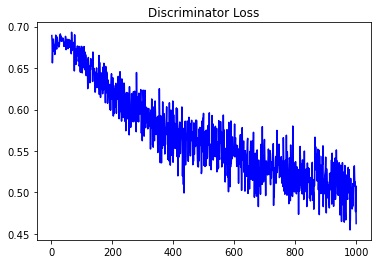

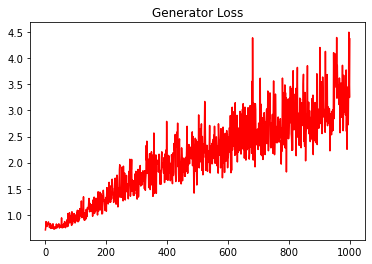

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
0.28666834596690594


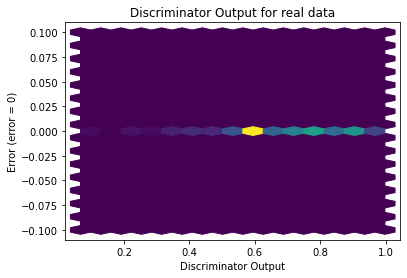

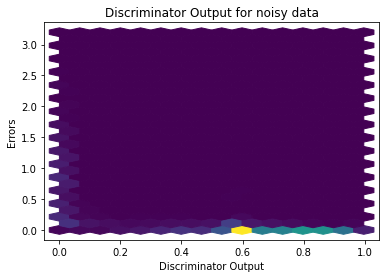

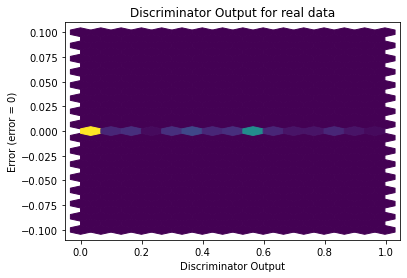

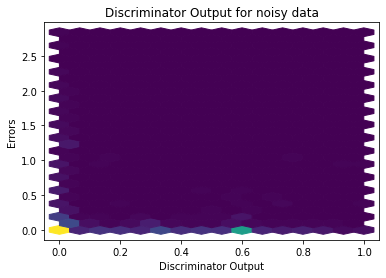

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
# #Generator
# gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
# constraints=network.weightConstraint()
# #Discriminator 
# disc3 = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.01, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.01, betas=(0.5, 0.999))


<span id="papermill-error-cell" style="color:red; font-family:Helvetica Neue, Helvetica, Arial, sans-serif; font-size:2em;">Execution using papermill encountered an exception here and stopped:</span>

In [20]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

NameError: name 'disc3' is not defined

In [ ]:
# ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
# sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

# print("MAE")
# print(mean(ABC_GAN3_metrics[1]))

In [ ]:
# sanityChecks.discProbVsError(train_data,disc3,device)
# sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [ ]:
# #Generator
# gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
# constraints=network.weightConstraint()
# #Discriminator 
# disc4 = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.01, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.01, betas=(0.5, 0.999))


In [ ]:
# ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [ ]:
# ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
# sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

# print("MAE")
# print(mean(ABC_GAN4_metrics[1]))

In [ ]:
# sanityChecks.discProbVsError(train_data,disc4,device)
# sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [ ]:
# print("Weight of the node at skip connection")
# for name,param in gen3.named_parameters():
#     if(name == "skipNode.weight"):
#         print(param)
#         sb.glue("Skip Connection Weight",param.item())

## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [ ]:
# print("Weight of the node at skip connection")
# for name,param in gen4.named_parameters():
#     if(name == "skipNode.weight"):
#         print(param)
#         sb.glue("Skip Connection Weight",param.item())